In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,\
precision_score,roc_auc_score,matthews_corrcoef,precision_recall_fscore_support,make_scorer,\
accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

from sklearn.model_selection import cross_validate,cross_val_score
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import ADASYN
 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,StackingClassifier,VotingClassifier

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [2]:
df=pd.read_excel("C:/Users/saich/OneDrive/Desktop/Diabetes_Classification.xlsx")

In [3]:
df.drop(labels="Patient number",axis=1,inplace=True)

In [4]:
df.replace({'Gender':{"female":"F","male":"M"}},inplace=True)

In [5]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cholesterol        50.000
Glucose            26.750
HDL Chol           21.000
Chol/HDL ratio      2.200
Age                26.000
Gender              1.000
Height              6.000
Weight             49.750
BMI                 8.175
Systolic BP        26.000
Diastolic BP       15.000
waist               8.000
hip                 7.000
Waist/hip ratio     0.100
dtype: float64


In [7]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
target=df["Diabetes"]
features=df.drop(columns="Diabetes",axis=1)

In [9]:
ada = ADASYN(random_state=42,sampling_strategy="minority") 
new_features, new_target = ada.fit_resample(features, target)

In [10]:
scaler = StandardScaler()
X_res=pd.DataFrame(scaler.fit_transform(new_features),columns=list(new_features.columns))
y_res=new_target

In [11]:
y_res.value_counts()

No diabetes    277
Diabetes       277
Name: Diabetes, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_res,
                                               y_res,
                                               test_size=0.35,
                                               random_state=42)

# Logistic Regression

In [13]:
LR=LogisticRegression(C=0.03359818286283781,penalty="l2",solver= 'liblinear',random_state=42)

LR.fit(X_train1,Y_train1)

LogisticRegression(C=0.03359818286283781, random_state=42, solver='liblinear')

In [14]:
print(classification_report(Y_test1,LR.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.88      0.92      0.90        96
 No diabetes       0.91      0.88      0.90        98

    accuracy                           0.90       194
   macro avg       0.90      0.90      0.90       194
weighted avg       0.90      0.90      0.90       194



In [15]:
cv = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
scoring = {'recall' : make_scorer(recall_score,pos_label="Diabetes") }

In [16]:
# for recall
results1 =cross_validate(estimator=LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)
# for accuracy
accuracy1 = model_selection.cross_val_score(LR, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [17]:
print("Accuracy",np.mean(accuracy1))
print("recall score is :",np.mean(results1["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(LR, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results1["score_time"]))
print("fit time is :",np.mean(results1["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,LR.predict(X_test1)))

Accuracy 0.8868421052631579
recall score is : 0.9058658008658009
roc-auc score is 0.9233404928404928
score time is : 0.0019042491912841797
fit time is : 0.002177119255065918
recall score for No diabetes is : 0.8478021978021978
matthews_corrcoef is:  0.7945555801711949


# Grid Search

In [18]:
# param_grid = [
#     {
#      'penalty' : ['l1', 'l2'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['liblinear']}
# ]

# # param_grid = [
# #     {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30]}
# # ]

# # param_grid = dict(n_neighbors=list(range(10, 31)))

# param_grid = [
#      {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30]}
#  ]
    

# # # # grid = RandomizedSearchCV(knn, param_distributions = param_grid, cv = 10,n_jobs=-1)
# grid=GridSearchCV(LR,param_grid,cv=5,n_jobs=-1)

# grid.fit(X_train1,Y_train1)



In [19]:
# grid.best_params_

# Decsison Trees

In [20]:
classifier1=DecisionTreeClassifier(criterion="entropy",max_depth=15,random_state=42)

In [21]:
classifier1.fit(X_train1,Y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)

In [22]:
print(classification_report(Y_test1,classifier1.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.90      0.97      0.93        96
 No diabetes       0.97      0.90      0.93        98

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.94      0.93      0.93       194



In [23]:
results2 =cross_validate(estimator=classifier1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy2 = model_selection.cross_val_score(classifier1, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [24]:
print("Accuracy",np.mean(accuracy2))
print("recall score is :",np.mean(results1["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(classifier1, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results1["score_time"]))
print("fit time is :",np.mean(results1["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=classifier1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,classifier1.predict(X_test1)))

Accuracy 0.8768421052631579
recall score is : 0.9058658008658009
roc-auc score is 0.8708431845931847
score time is : 0.0019042491912841797
fit time is : 0.002177119255065918
recall score for No diabetes is : 0.8565262515262514
matthews_corrcoef is:  0.868325878202263


# KNN

In [25]:
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train1, Y_train1) 

KNeighborsClassifier(n_neighbors=11)

In [26]:
print(classification_report(Y_test1,knn.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.81      1.00      0.89        96
 No diabetes       1.00      0.77      0.87        98

    accuracy                           0.88       194
   macro avg       0.90      0.88      0.88       194
weighted avg       0.90      0.88      0.88       194



In [27]:
results3 =cross_validate(estimator=knn,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy3 = model_selection.cross_val_score(knn, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [28]:
print("Accuracy",np.mean(accuracy3))
print("recall score for Diabetes is :",np.mean(results3["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(knn, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results3["score_time"]))
print("fit time is :",np.mean(results3["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=knn,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,knn.predict(X_test1)))

Accuracy 0.8707894736842106
recall score for Diabetes is : 0.9642424242424242
roc-auc score is 0.9483601398601398
score time is : 0.003127765655517578
fit time is : 0.001562047004699707
recall score for No diabetes is : 0.7618919968919969
matthews_corrcoef is:  0.785741568881324


# Naive bayes

In [29]:
nb = GaussianNB()
nb.fit(X_train1, Y_train1)

GaussianNB()

In [30]:
print(classification_report(Y_test1,nb.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.87      0.85      0.86        96
 No diabetes       0.86      0.88      0.87        98

    accuracy                           0.87       194
   macro avg       0.87      0.87      0.87       194
weighted avg       0.87      0.87      0.87       194



In [31]:
results4 =cross_validate(estimator=nb,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy4 = model_selection.cross_val_score(nb, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [32]:
print("Accuracy",np.mean(accuracy4))
print("recall score is :",np.mean(results4["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(nb, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results4["score_time"]))
print("fit time is :",np.mean(results4["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=nb,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,nb.predict(X_test1)))

Accuracy 0.8760526315789473
recall score is : 0.7782209418548428
roc-auc score is 0.9374470529470529
score time is : 0.0
fit time is : 0.004689359664916992
recall score for No diabetes is : 0.8878296703296703
matthews_corrcoef is:  0.7320289900827764


# SVM

In [33]:
svm = SVC(kernel='linear',probability=True)
svm.fit(X_train1, Y_train1)

SVC(kernel='linear', probability=True)

In [34]:
print(classification_report(Y_test1,svm.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.89      0.91      0.90        96
 No diabetes       0.91      0.89      0.90        98

    accuracy                           0.90       194
   macro avg       0.90      0.90      0.90       194
weighted avg       0.90      0.90      0.90       194



In [35]:
results5 =cross_validate(estimator=svm,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy5 = model_selection.cross_val_score(svm, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1)

In [36]:
print("Accuracy",np.mean(accuracy5))
print("recall score is :",np.mean(results5["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(svm, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results5["score_time"]))
print("fit time is :",np.mean(results5["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=svm,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,svm.predict(X_test1)))

Accuracy 0.8055555555555556
recall score is : 0.8278638131734107
roc-auc score is 0.9467086247086248
score time is : 0.004687213897705078
fit time is : 0.020313525199890138
recall score for No diabetes is : 0.8791514041514041
matthews_corrcoef is:  0.7940051020408163


# Random Forests

In [37]:
rf=RandomForestClassifier(oob_score=True)
rf.fit(X_train1, Y_train1)

RandomForestClassifier(oob_score=True)

In [38]:
print(classification_report(Y_test1,rf.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.95      0.99      0.97        96
 No diabetes       0.99      0.95      0.97        98

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



In [39]:
results6 =cross_validate(estimator=rf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy6 = model_selection.cross_val_score(rf, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [40]:
print("Accuracy",np.mean(accuracy6))
print("recall score is :",np.mean(results6["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(rf, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results6["score_time"]))
print("fit time is :",np.mean(results6["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=rf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,rf.predict(X_test1)))

Accuracy 0.9689473684210526
recall score is : 0.9517424242424243
roc-auc score is 0.9931235431235432
score time is : 0.011406469345092773
fit time is : 0.15486543178558348
recall score for No diabetes is : 0.9722222222222221
matthews_corrcoef is:  0.9389622287087327


# Ensembel

In [41]:
model1= VotingClassifier(estimators=[ ('dt', classifier1),('knn',knn),('svm',svm),('nb',nb),('LR',LR)], voting='soft')
model1.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('nb', GaussianNB()),
                             ('LR',
                              LogisticRegression(C=0.03359818286283781,
                                                 random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

In [42]:
print(classification_report(Y_test1,model1.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.89      0.96      0.92        96
 No diabetes       0.96      0.89      0.92        98

    accuracy                           0.92       194
   macro avg       0.92      0.92      0.92       194
weighted avg       0.92      0.92      0.92       194



In [43]:
results =cross_validate(estimator=model1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)
accuracy = model_selection.cross_val_score(LR, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [44]:
print("Accuracy",np.mean(accuracy))
print("recall score is :",np.mean(results["test_recall"]))
print("score time is :",np.mean(results["score_time"]))
print("fit time is :",np.mean(results["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=model1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,model1.predict(X_test1)))

Accuracy 0.8868421052631579
recall score is : 0.9058658008658009
score time is : 0.0062513589859008786
fit time is : 0.01857337951660156
recall score for No diabetes is : 0.8808913308913308
matthews_corrcoef is:  0.8476666655003696


# Ensemble of random forests classifiers.

In [45]:
logbagClf = BaggingClassifier(rf, n_estimators = 5)
logbagClf.fit(X_train1, Y_train1)

BaggingClassifier(base_estimator=RandomForestClassifier(oob_score=True),
                  n_estimators=5)

In [46]:
print(classification_report(Y_test1,logbagClf.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.94      1.00      0.97        96
 No diabetes       1.00      0.94      0.97        98

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



In [47]:
accuracy7=model_selection.cross_val_score(logbagClf, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [48]:
print("accuracy score is",np.mean(accuracy7))
print("recall score is :",np.mean(cross_validate(estimator=logbagClf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(logbagClf, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=logbagClf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,logbagClf.predict(X_test1)))

accuracy score is 0.9431578947368422
recall score is : 0.9426515151515151
roc-auc score is 0.9885594405594406
recall score for No diabetes is : 0.922954822954823
matthews_corrcoef is:  0.9399752238056849


In [49]:
# recall_score(Y_test1, model1.predict(X_test1), pos_label="Diabetes")

# Ensemble of logistic regression classifiers.

In [50]:
bag_LR = BaggingClassifier(LR, n_estimators = 10,random_state=42)
bag_LR.fit(X_train1, Y_train1)

BaggingClassifier(base_estimator=LogisticRegression(C=0.03359818286283781,
                                                    random_state=42,
                                                    solver='liblinear'),
                  random_state=42)

In [51]:
print(classification_report(Y_test1,bag_LR.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.88      0.91      0.89        96
 No diabetes       0.91      0.88      0.89        98

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194



In [52]:
print("Accuracy is",np.mean( model_selection.cross_val_score(bag_LR, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)))
print("recall score is :",np.mean(cross_validate(estimator=bag_LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(bag_LR, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=bag_LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,bag_LR.predict(X_test1)))

Accuracy is 0.881578947368421
recall score is : 0.9058658008658009
roc-auc score is 0.9221527916527916
recall score for No diabetes is : 0.8335164835164836
matthews_corrcoef is:  0.7839260185782281


# Function to get scores(KFold cross validation)

In [53]:
def evaluate_model_accuracy(model, X, y):
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)
    return scores


def evaluate_model_recall_positive(model,X,y):
    scoring = {'recall' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_recall"]

def evaluate_model_recall_negative(model,X,y):
    scoring = {'recall' : make_scorer(recall_score,pos_label="No diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_recall"]

def evaluate_model_roc_auc(model, X, y):
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=kfold, n_jobs=-1)
    return scores

def evaluate_model_matthews_corrcoef(model,X,y):
    score=matthews_corrcoef(y,model.predict(X))
    return score

def evaluate_model_precision(model,X,y):
    scoring = {'precision' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_precision"]


In [54]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(model1,X_res,y_res)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(model1,X_res,y_res)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(model1,X_res,y_res)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(model1,X_res,y_res)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(model1,X_res,y_res))

accuracy is:  0.9005519480519479
diabetes recall is:  0.9244892448749074
no diabetes recall is:  0.8747477689934586
roc_auc is:  0.9755805511553477
matthews_corrcoef is:  0.8318930515330117


# AdaBoost

In [55]:
Adaboost = AdaBoostClassifier(random_state=42)
Adaboost.fit(X_train1, Y_train1)

AdaBoostClassifier(random_state=42)

In [56]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(Adaboost,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(Adaboost,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(Adaboost,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(Adaboost,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(Adaboost,X_test1,Y_test1))

accuracy is:  0.9223684210526317
diabetes recall is:  0.9642424242424242
no diabetes recall is:  0.8758602508602508
roc_auc is:  0.9608843378843378
matthews_corrcoef is:  0.8878253982502649


# Gradient Boosting

In [57]:
Gboost= GradientBoostingClassifier(learning_rate=0.9,random_state=42)
Gboost.fit(X_train1, Y_train1)

GradientBoostingClassifier(learning_rate=0.9, random_state=42)

In [58]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(Gboost,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(Gboost,X_test1,Y_test1))
print("precision is: ",np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1)))

accuracy is:  0.9531578947368422
diabetes recall is:  0.9742424242424242
no diabetes recall is:  0.9163614163614164
roc_auc is:  0.986052836052836
matthews_corrcoef is:  0.9497370184014335
precision is:  0.9742424242424242


# ExtraTreesClassifier

In [59]:
etc = ExtraTreesClassifier(n_estimators=30)
etc.fit(X_train1,Y_train1)

ExtraTreesClassifier(n_estimators=30)

In [60]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(etc,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(etc,X_test1,Y_test1))
print("precision is: ",np.mean(evaluate_model_precision(etc,X_test1,Y_test1)))

accuracy is:  0.958421052631579
diabetes recall is:  0.956547619047619
no diabetes recall is:  0.9592185592185591
roc_auc is:  0.9910256410256411
matthews_corrcoef is:  0.9695423500723407
precision is:  0.956547619047619


# Confusion Matrix

In [98]:
def conf_matrix(y_true,x_true,model):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_true, model.predict(x_true)), annot=True)
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Diabetes', 'No Diabetes']); ax.yaxis.set_ticklabels(['Diabetes', 'No Diabetes']);
    return ax

# testing scores

In [61]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(rf,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(rf,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(rf,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(rf,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(rf,X_test1,Y_test1))
print("precision is: ",np.mean(evaluate_model_precision(rf,X_test1,Y_test1)))

accuracy is:  0.9639473684210527
diabetes recall is:  0.9642424242424242
no diabetes recall is:  0.9585775335775336
roc_auc is:  0.9918414918414917
matthews_corrcoef is:  0.9389622287087327
precision is:  0.9608333333333334


In [62]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(Gboost,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(Gboost,X_test1,Y_test1))
print("precision is: ",np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1)))

accuracy is:  0.9531578947368422
diabetes recall is:  0.9742424242424242
no diabetes recall is:  0.9163614163614164
roc_auc is:  0.986052836052836
matthews_corrcoef is:  0.9497370184014335
precision is:  0.9742424242424242


In [63]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(rf,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(rf,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(rf,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(rf,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(rf,X_test1,Y_test1))
print("precision is: ",np.mean(evaluate_model_precision(rf,X_test1,Y_test1)))

accuracy is:  0.9636842105263158
diabetes recall is:  0.9642424242424242
no diabetes recall is:  0.9669108669108668
roc_auc is:  0.9931235431235432
matthews_corrcoef is:  0.9389622287087327
precision is:  0.9517424242424243


# showing Confuction Matrix

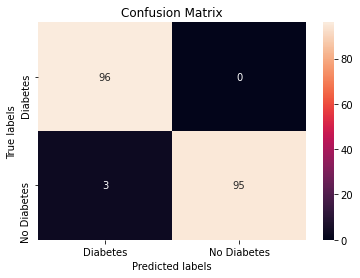

In [105]:
conf_matrix(Y_test1,X_test1,etc)
plt.show()

In [87]:
Y_test1.value_counts()

No diabetes    98
Diabetes       96
Name: Diabetes, dtype: int64